<a href="https://colab.research.google.com/github/julmiha25-sys/Python_visualisation/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D1%8B/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

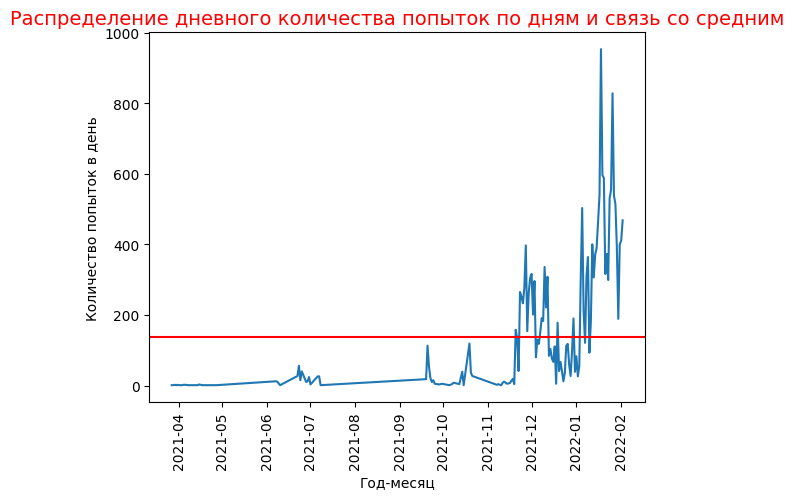

In [293]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('coderun.csv')
df['created_at']=pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S.%f").dt.date
df=df.groupby('created_at')['id'].agg({'count'}).reset_index()
plt.plot(df['created_at'],df['count'])
plt.xticks(rotation=90)
mean_value=df['count'].mean()
plt.axhline(y=mean_value, color='red')
plt.title('Распределение дневного количества попыток по дням и связь со средним',fontsize=14,color='red')
plt.ylabel('Количество попыток в день', fontsize=10)
plt.xlabel('Год-месяц', fontsize=10);

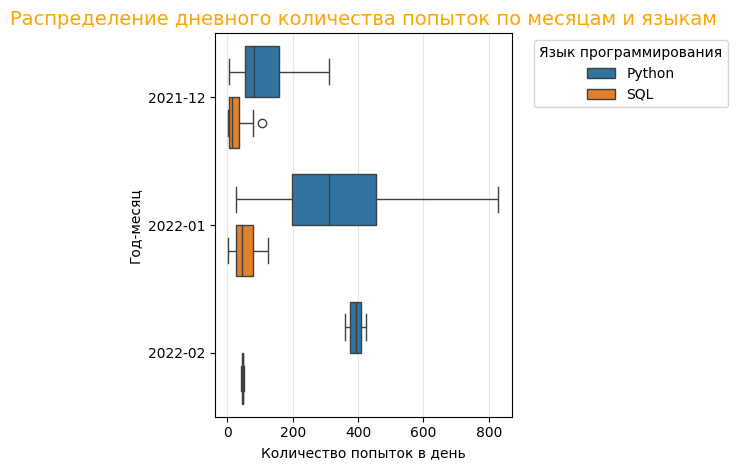

In [292]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('coderun.csv')
df['created_at']=pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S.%f")
df=df[df['created_at'] >= '2021-12-01']
df['day']=df['created_at'].dt.date
df=df.groupby(['day','language_id'])['id'].agg({'count'}).reset_index()
df['month']=pd.to_datetime(df['day']).dt.strftime('%Y-%m')
language_name={2:'Python',3:'SQL'}
df['language_id']=df['language_id'].replace(language_name)
sns.boxplot(data=df,orient='h', x='count', y='month', hue='language_id' )
plt.title('Распределение дневного количества попыток по месяцам и языкам',color='orange', fontsize=14)
plt.xlabel('Количество попыток в день', fontsize=10)
plt.ylabel('Год-месяц', fontsize=10)
plt.legend(title='Язык программирования', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

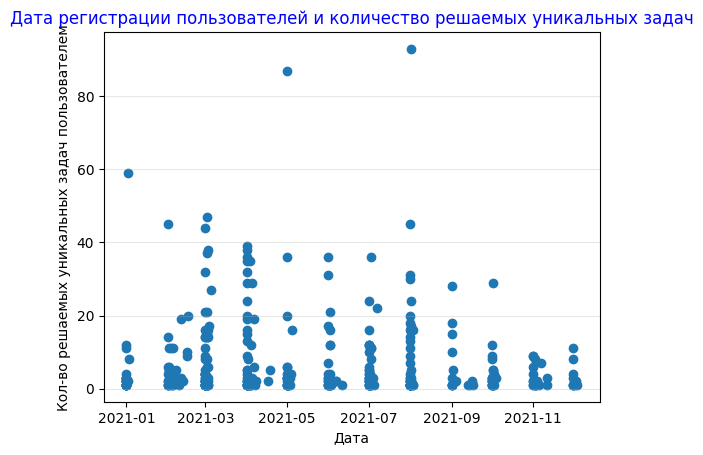

In [291]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('coderun.csv')
df1=pd.read_csv('entries.csv', delimiter=";")
df['created_at']=pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S.%f")
df1['entry_date']=pd.to_datetime(df1['entry_date'], format="%Y-%m-%d")
dff=df.merge(df1,left_on='user_id',right_on='user_id')
dff=dff.groupby('user_id').agg({'entry_date':'first','problem_id':'nunique'}).reset_index()
plt.scatter(dff['entry_date'],dff['problem_id'])
plt.title("Дата регистрации пользователей и количество решаемых уникальных задач",color='blue')
plt.xlabel('Дата', fontsize=10)
plt.ylabel('Кол-во решаемых уникальных задач пользователем', fontsize=10)
plt.grid(True, alpha=0.3, axis='y');

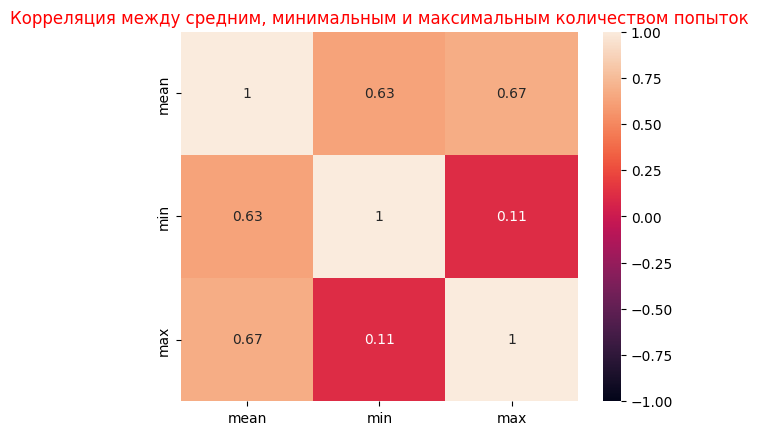

In [287]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('coderun.csv')
df['created_at']=pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S.%f")
df=df.groupby(['user_id','problem_id'])['created_at'].count().reset_index()
df.columns=['user_id','problem_id','attempts']
df=df.groupby('user_id').agg({'attempts': ['mean','min','max']}).reset_index()
df.columns=['user_id','mean','min','max']
df1=df[['mean','min','max']]
sns.heatmap(df1.corr(),vmax=1,vmin=-1,annot=True)
plt.title("Корреляция между средним, минимальным и максимальным количеством попыток",color='red');

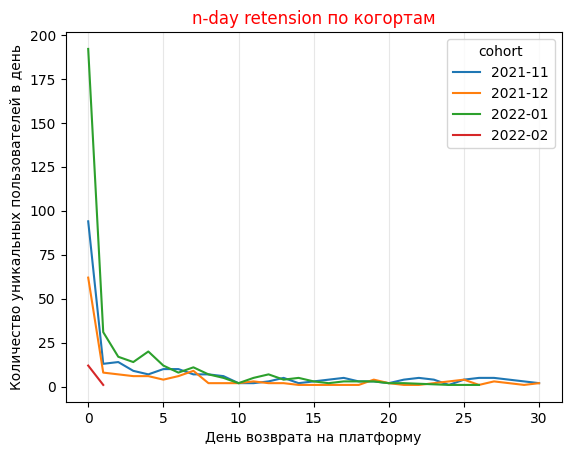

In [282]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('coderun.csv')
df['created_at']=pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S.%f")
df=df[df['created_at']>='2021-11-01 00:00:00.000']
df1=df.groupby('user_id')['created_at'].agg('first').reset_index()
df1['cohort']=df1['created_at'].dt.strftime("%Y-%m")
df1=df1.rename(columns={'created_at': 'first'})
df=df.merge(df1, left_on='user_id', right_on='user_id')
df['day']=(df['created_at']-df['first']).dt.days
df=df[df['day']<=30]
df=df.groupby(['cohort','day']).agg(users_count=('user_id', 'nunique')).reset_index()
sns.lineplot(data=df, x='day', y='users_count',hue='cohort')
plt.title("n-day retension по когортам",color='red')
plt.xlabel('День возврата на платформу', fontsize=10)
plt.ylabel('Количество уникальных пользователей в день', fontsize=10)
plt.grid(True, alpha=0.3, axis='x');

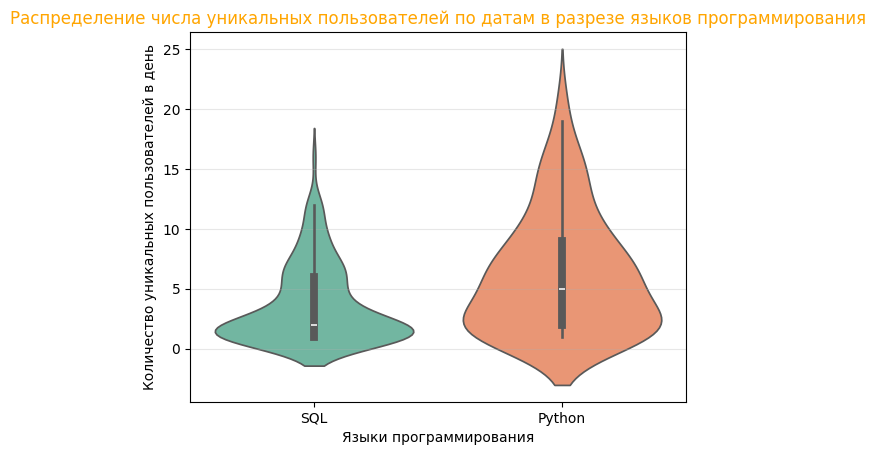

In [278]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('coderun.csv')
df['created_at']=pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S.%f").dt.date
df=df.groupby(['created_at','language_id']).agg(count=('user_id','nunique')).reset_index()
language_name={2:'Python',3:'SQL'}
df['language_id']=df['language_id'].replace(language_name)
sns.violinplot(data=df, y='count', x='language_id',palette='Set2',hue='language_id',legend=False)
plt.title("Распределение числа уникальных пользователей по датам в разрезе языков программирования", color='orange')
plt.xlabel('Языки программирования', fontsize=10)
plt.ylabel('Количество уникальных пользователей в день', fontsize=10)
plt.grid(True, alpha=0.3, axis='y');

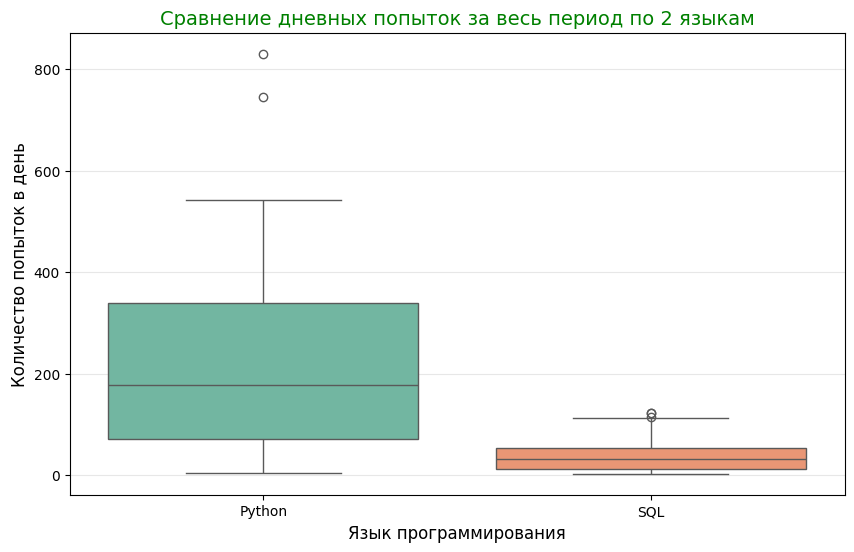

In [279]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('coderun.csv')
df['created_at']=pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S.%f")
df=df[df['created_at'] >= '2021-12-01']
df['created_at']=df['created_at'].dt.date
df=df.groupby(['created_at','language_id'])['id'].agg({'count'}).reset_index()
language_name={2:'Python',3:'SQL'}
df['language_id']=df['language_id'].replace(language_name)
df.columns=['date', 'language_id', 'daily_attempts']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='language_id',y='daily_attempts',hue='language_id',palette='Set2',legend=False)
plt.title('Сравнение дневных попыток за весь период по 2 языкам', fontsize=14,color='green')
plt.xlabel('Язык программирования', fontsize=12)
plt.ylabel('Количество попыток в день', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
